<div class = 'alert alert-info'><h1 style= 'text-align:center; color:black'> Cats vs Dogs Classification Problem </h1></div>
The Cats & Dogs is a foundational problem for a basic CNN(convolutional neural network) model which involves classifying images as a dog or a cat. It involves distinguishing between images of dogs and cats, making it an excellent dataset for learning how to develop, evaluate, and apply deep learning techniques for image classification. This includes designing a reliable test framework to assess model performance, experimenting with parameter adjustments to improve accuracy, and saving/loading the trained model to make predictions on new data.

<div class = 'alert alert-info'><h2 style= 'text-align:center; color:black'> Table of Content </h2></div>

1. [Data Description](#1)
1. [Loading Libraries](#2)
1. [Data Extraction](#3)
1. [Data Exploration](#4)
1. [Train Test Split](#5)
   1. [Using Dataframe](#6)
   1. [Using Directory](#7)
1. [Data Preparation](#8)
   1. [Image Data Generator](#9)
      1. [Using Dataframe](#10)
      1. [Using Directory](#11)
1. [Deep Learning Model](#12)
   1. [Model Layer](#13)
   1. [Callbacks](#14)
   1. [Compile Model](#15)
   1. [Fit Model](#16)
   1. [Plot Result](#17)
   1. [Evaluation](#18)
1. [Prediction](#19)


<a id='1'></a>
<div class = 'alert alert-info'><h2 style= 'text-align:center; color:black'> Data Description </h2></div>

The training archive contains 25,000 images of dogs and cats. 

Train your algorithm on these files and predict the labels for test1.zip.

* **1 Dog**
* **0 Cat**

<a id='2'></a>
<div class='alert alert-info'><h2 style="text-align:center;color:black">Loading Libraries</h2></div>

In [1]:
# Basic
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

<a id='3'></a>
<div class='alert alert-info'><h2 style='text-align:center; color:black'>Data Extraction</h2></div>

In [2]:
train_path = '/kaggle/input/dogs-vs-cats/test1.zip'
test_path = '/kaggle/input/dogs-vs-cats/train.zip'

files = "/kaggle/working/"

import zipfile

with zipfile.ZipFile(train_path, 'r') as zipp:
    zipp.extractall(files)
    
with zipfile.ZipFile(test_path, 'r') as zipp:
    zipp.extractall(files)

# Loading image in Dataframe

In [3]:
image_dir = '/kaggle/working/train'

filenames = os.listdir(image_dir)
labels = [x.split('.')[0] for x in filenames]

data = pd.DataFrame({'filename':filenames, 'labels': labels})
data.head()

,filename,labels
0,dog.2961.jpg,dog
1,cat.5512.jpg,cat
2,dog.4896.jpg,dog
3,dog.2221.jpg,dog
4,dog.9345.jpg,dog


<a id='4'></a>
<div class='alert alert-info'><h2 style='text-align:center;color:black'>Data Exploration</h2></div>

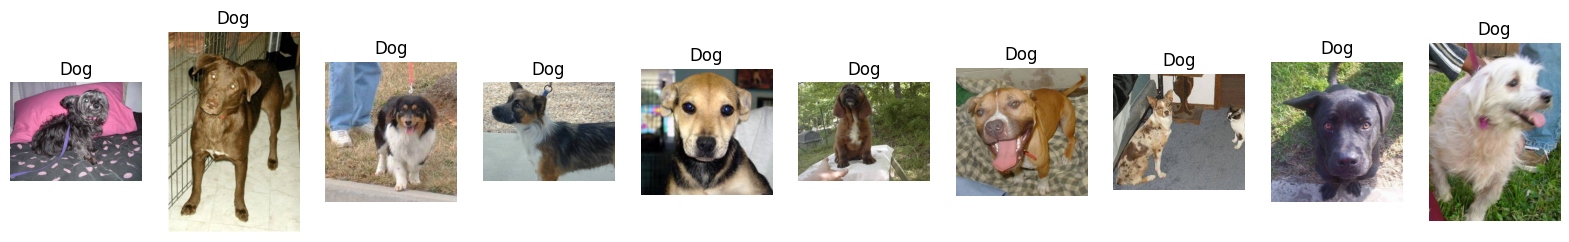

In [4]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

for i in range(10):

    plt.subplot(1,10,i+1)
    filename = 'train/' + 'dog.'+ str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Dog', fontsize=12)
    plt.axis('off')

plt.show()

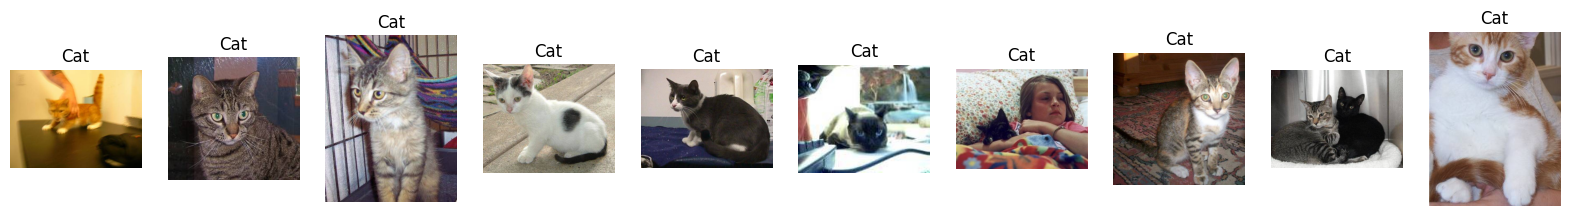

In [5]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

for i in range(10):

    plt.subplot(1,10,i+1)
    filename= 'train/'+ 'cat.'+str(i) + '.jpg'
    image= imread(filename)
    plt.imshow(image)
    plt.title('Cat')
    plt.axis('off')

plt.show()

Different sizes and set of images are displayed, allowing to scan both categories. However, the presence of humans in some images can make classification challenging for the model.

<a id='5'></a>
<div class='alert alert-info'><h2 style='text-align:center;color:black'>Train Test Split</h2></div>

<a id='6'></a>
<div class='alert alert-warning'><h2 style='text-align:center;color:black'>Using Dataframe</h2></div>

In [6]:
#train test split using dataframe

labels = data['labels']

X_train, X_temp = train_test_split(data, test_size = 0.2, stratify=labels, random_state=42)

X_temp_val = X_temp['labels']

X_test, X_val = train_test_split(X_temp, test_size=0.5, stratify=X_temp_val, random_state=42)

print('Shape of training data: ', X_train.shape)
print('Shape of testing data: ', X_test.shape)
print('Shape of validation data: ', X_val.shape)

Shape of training data:  (20000, 2)
Shape of testing data:  (2500, 2)
Shape of validation data:  (2500, 2)


Creating barplot to see the class distribution in training dataset

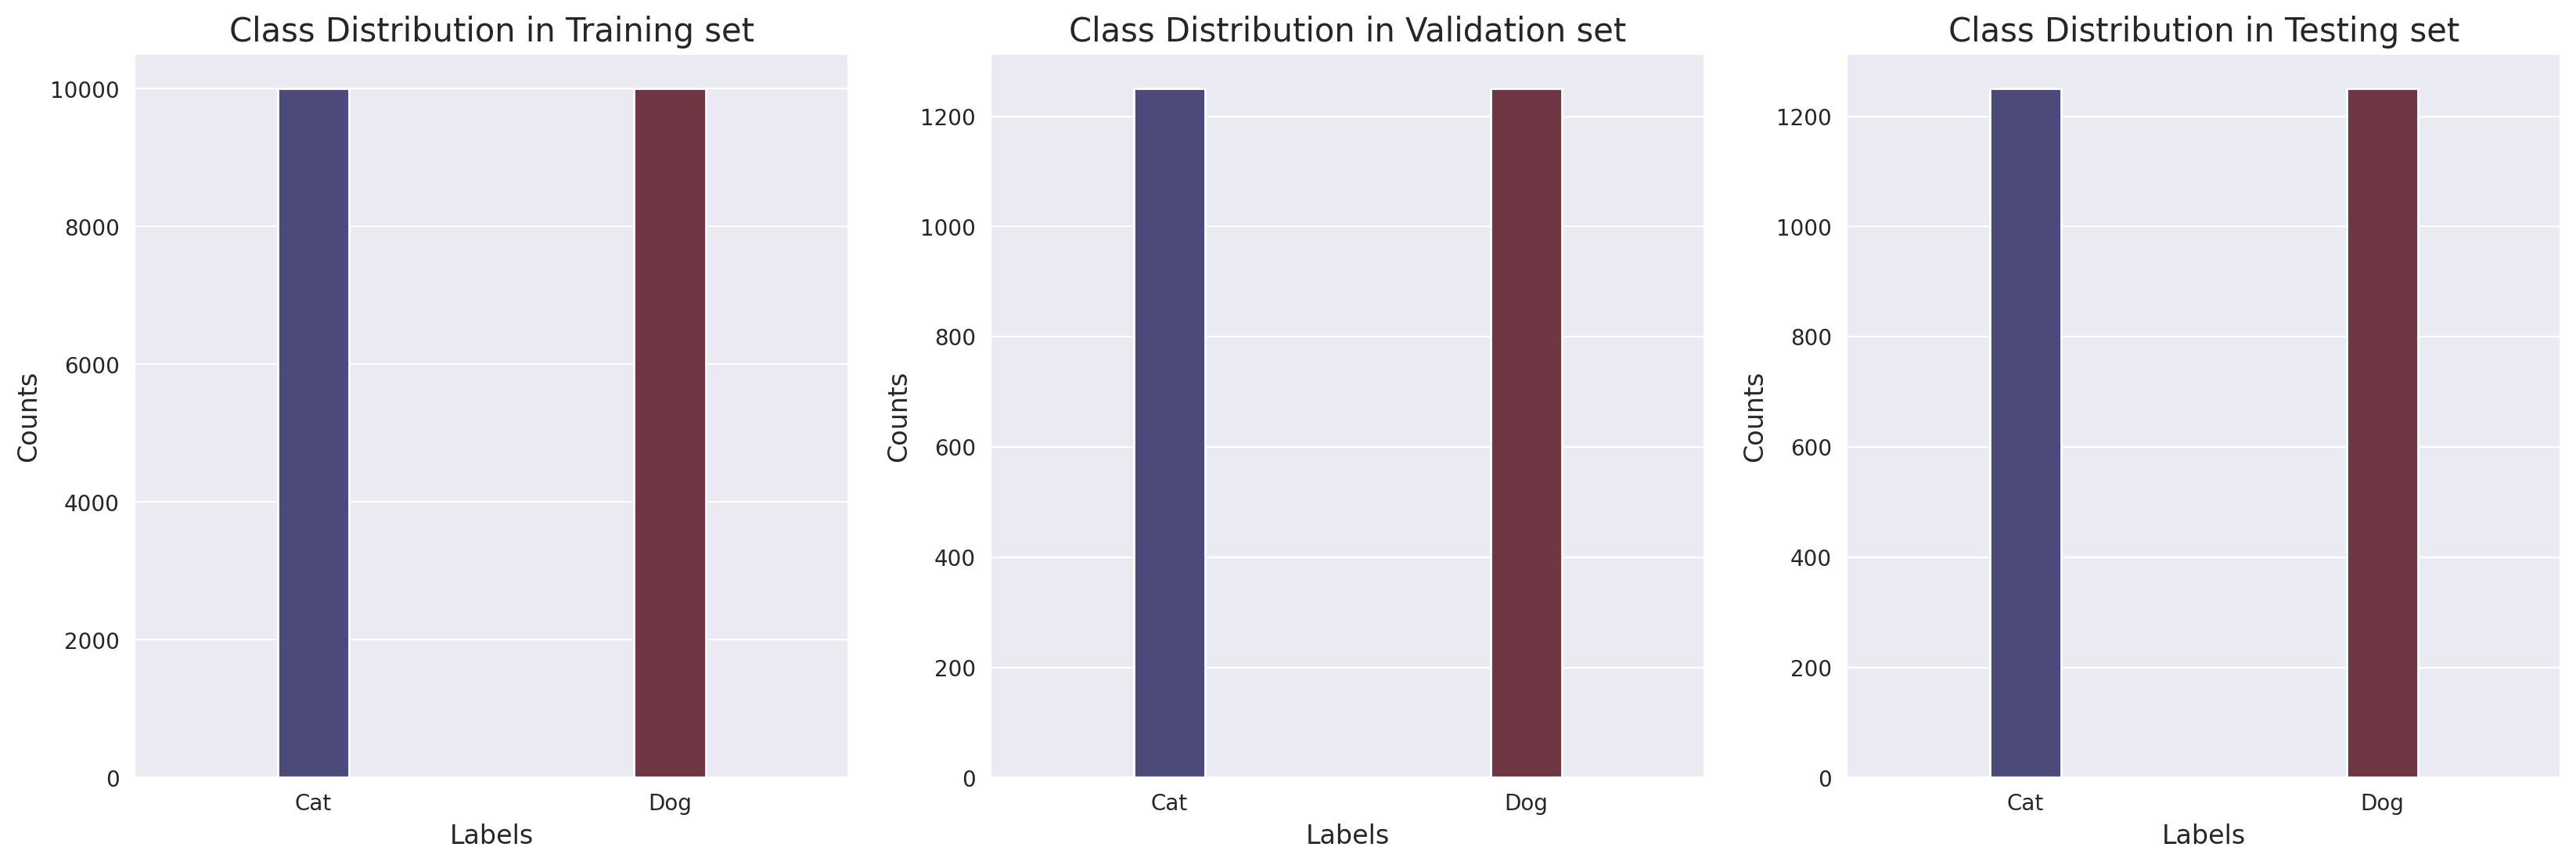

In [7]:
labelss = ['Cat','Dog']

label1, count1 = np.unique(X_train.labels, return_counts=True)
label2, count2 = np.unique(X_val.labels, return_counts=True)
label3, count3 = np.unique(X_test.labels, return_counts=True)

uni1 = pd.DataFrame(data=count1, index=labelss, columns=['Count1'])
uni2 = pd.DataFrame(data=count2, index=labelss, columns=['Count2'])
uni3 = pd.DataFrame(data=count3, index=labelss, columns=['Count3'])

plt.figure(figsize=(20,6), dpi=200)
sns.set_style('darkgrid')

plt.subplot(131)
sns.barplot(data=uni1, x=uni1.index, y='Count1', palette='icefire', width=0.2).set_title('Class Distribution in Training set', fontsize=15)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Counts', fontsize=12)

plt.subplot(132)
sns.barplot(data=uni2, x=uni2.index, y = 'Count2', palette='icefire', width=0.2).set_title('Class Distribution in Validation set', fontsize=15)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Counts', fontsize=12)

plt.subplot(133)
sns.barplot(data=uni3, x=uni3.index,y='Count3', palette='icefire', width=0.2).set_title('Class Distribution in Testing set', fontsize=15)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Counts', fontsize=12)

plt.show()

<a id='7'></a>
<div class='alert alert-warning'><h2 style='text-align:center;color:black'>Using Directory</h2></div>

In [8]:
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']

for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.2
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
        src = src_directory + '/' + file
        dst_dir = 'train/'
        if random() < val_ratio:
            dst_dir = 'test/'
        if file.startswith('cat'):
            dst = dataset_home + dst_dir + 'cats/' + file
            copyfile(src, dst)
        elif file.startswith('dog'):
            dst = dataset_home + dst_dir + 'dogs/' + file
            copyfile(src, dst)

            
path1 = "/kaggle/working/dataset_dogs_vs_cats/train/cats"
path2 = "/kaggle/working/dataset_dogs_vs_cats/train/dogs"
path3 = "/kaggle/working/dataset_dogs_vs_cats/test/cats"
path4 = "/kaggle/working/dataset_dogs_vs_cats/test/dogs"


print('Then number of cat images in training data is' ,len(os.listdir(path1)))
print('Then number of dog images in training data is' ,len(os.listdir(path2)))
print('Then number of cat images in validation data is' ,len(os.listdir(path3)))
print('Then number of dog images in validation data is' ,len(os.listdir(path4)))


Then number of cat images in training data is 9976
Then number of dog images in training data is 9934
Then number of cat images in validation data is 2524
Then number of dog images in validation data is 2566


<a id='8'></a>
<div class='alert alert-info'><h2 style='text-align:center;color:black'>Data Preparation</h2></div>

In [9]:
# parameters
image_size = 128
image_channel = 3
bat_size = 32

<a id='9'></a>
<div class='alert alert-danger'><h2 style='text-align:center;color:black'>Image Data Generator</h2></div>

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   horizontal_flip=True,
                                   zoom_range=0.2,
                                   shear_range=0.1,
                                   fill_mode='reflect',
                                   width_shift_range=0.1,
                                   height_shift_range=0.1
    
)
test_datagen = ImageDataGenerator(rescale=1./255)

<a id='10'></a>
<div class='alert alert-warning'><h4 style='text-align:center;color:black'>Using Dataframe</h4></div>

In [11]:
train_generator = train_datagen.flow_from_dataframe(X_train,
                                                    directory='train/',
                                                    x_col = 'filename',
                                                    y_col = 'labels',
                                                    batch_size = bat_size,
                                                    target_size= (image_size, image_size)
                                                   )

val_generator = train_datagen.flow_from_dataframe(X_val,
                                                  directory='train/',
                                                  x_col = 'filename',
                                                  y_col = 'labels',
                                                  batch_size = bat_size,
                                                  target_size= (image_size, image_size),
                                                  shuffle=False
                                                   )

test_generator = train_datagen.flow_from_dataframe(X_test,
                                                   directory='train/',
                                                   x_col = 'filename',
                                                   y_col = 'labels',
                                                   batch_size = bat_size,
                                                   target_size= (image_size, image_size),
                                                   shuffle=False
                                                   )

Found 20000 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


<a id='11'></a>
<div class='alert alert-warning'><h4 style='text-align:center;color:black'>Using Directory</h4></div>

In [12]:
train_gen = train_datagen.flow_from_directory('/kaggle/working/dataset_dogs_vs_cats/train',
                                              class_mode = 'binary',
                                              batch_size = bat_size,
                                              target_size= (image_size, image_size)
                                             )

val_gen = train_datagen.flow_from_directory('/kaggle/working/dataset_dogs_vs_cats/test',
                                            class_mode = 'binary',
                                            batch_size = bat_size,
                                            target_size= (image_size, image_size),
                                            shuffle=False
                                            )

Found 19910 images belonging to 2 classes.
Found 5090 images belonging to 2 classes.


<a id='12'></a>
<div class='alert alert-info'><h2 style='text-align:center;color:black'>Deep Learning Model</h2></div>

<a id='13'></a>
<div class='alert alert-danger'><h3 style='text-align:center;color:black'>Model Layer</h3></div>


### Architecture

The architecture of the Cat vs Dog Image Classification model consists of the following Layers and components:

#### Layers :
* The input layer consist of a Conv2D with 32 filters and activation relu.
* The model contain the 3 blocks of convolution with increasing filters and activation relu.
* Each convolution block contains Batch Noramlization, Max pooling (pool_size = 2) and Dropout (0.2).
* The fully connected layers contain Flatten layer, Dense layer with 512 units and a Dropout layer.
* The output layer is a Dense layer with 2 units and softmax activation.

#### Components:

* **Input Layer:** Receives input images for classification.
* **Convolutional Layers:** Extract features from the images through convolutional operations.
* **Pooling Layers:** Reduce the spatial dimensions of the feature maps.
* **Flatten Layer:** Convert the 2D feature maps into a 1D vector.
* **Fully Connected Layers:** Perform classification using densely connected layers.
* **Output Layer:** Provides the final prediction probabilities for cat and dog classes.

In [13]:
model = Sequential()

#Input layer
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(image_size, image_size, image_channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Block 1
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Block 2
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Block 3
model.add(Conv2D(256,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#Output layer
model.add(Dense(2, activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 5,112,514 (19.50 MB)

 Trainable params: 5,110,530 (19.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

<a id='14'></a>
<div class='alert alert-danger'><h3 style='text-align:center;color:black'>Callbacks</h3></div>

We will be using two Callbacks:-
* **ReduceLROnPlateau :** Reduce learning rate when a metric has stopped improving.
* **EarlyStopping :** Stop training when a monitored metric has stopped improving.

In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            factor=0.5,
                                            min_lr=0.00001,
                                            verbose=1)

early_stopping= EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=0)

<a id='15'></a>
<div class='alert alert-danger'><h3 style='text-align:center;color:black'>Compile the Model</h3></div>

* **Optimizer** :- To minimize cost function we use different methods For ex :- like gradient descent, stochastic gradient descent. So these are call optimizers. We are using a default one here which is adam.
​
* **Loss** :- To make our model better we either minimize loss or maximize accuracy. Neural Networks always minimize loss. To measure it we can use different formulas like 'categorical_crossentropy' or 'binary_crossentropy'. Here I have used binary_crossentropy.
​
* **Metrics** :- This is to denote the measure of your model. Can be accuracy or some other metric.

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

<a id='16'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Fit the model </h3> </div>

We are now going to train our compiled model using the train iterator (train_generator) and use the val iterator (val_generator) as a validation dataset during training.

The number of steps for the train and validation iterators must be specified. This is the number of batches that will comprise one epoch. This can be specified via the length of each iterator, and will be the total number of images in the train and validation directories divided by the batch size (32).

The model will be fit for 30 epochs.

In [16]:
cat_dog = model.fit(train_generator,
                    validation_data = val_generator, 
                    callbacks=[early_stopping,learning_rate_reduction],
                    epochs = 30,
                    # steps_per_epoch = len(train_generator),
                    # validation_steps = len(val_generaotor),
                   )

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 120s 168ms/step - accuracy: 0.6255 - loss: 0.7418 - val_accuracy: 0.6408 - val_loss: 0.7248 - learning_rate: 0.0010
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 103s 163ms/step - accuracy: 0.7393 - loss: 0.5333 - val_accuracy: 0.7168 - val_loss: 0.5626 - learning_rate: 0.0010
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 103s 163ms/step - accuracy: 0.7884 - loss: 0.4524 - val_accuracy: 0.7512 - val_loss: 0.5222 - learning_rate: 0.0010
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 102s 162ms/step - accuracy: 0.8179 - loss: 0.4007 - val_accuracy: 0.8384 - val_loss: 0.3608 - learning_rate: 0.0010
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 164ms/step - accuracy: 0.8428 - loss: 0.3546 - val_accuracy: 0.6144 - val_loss: 1.1512 - learning_rate: 0.0010
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 164ms/step - accuracy: 0.8599 - loss: 0.3211 - val_accuracy: 0.8564 - val_loss: 0.3253 - learning_rate: 0.0010
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 103s 163ms/step - accuracy: 0.8613 

<a id='16'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Plot the sesults </h3> </div>

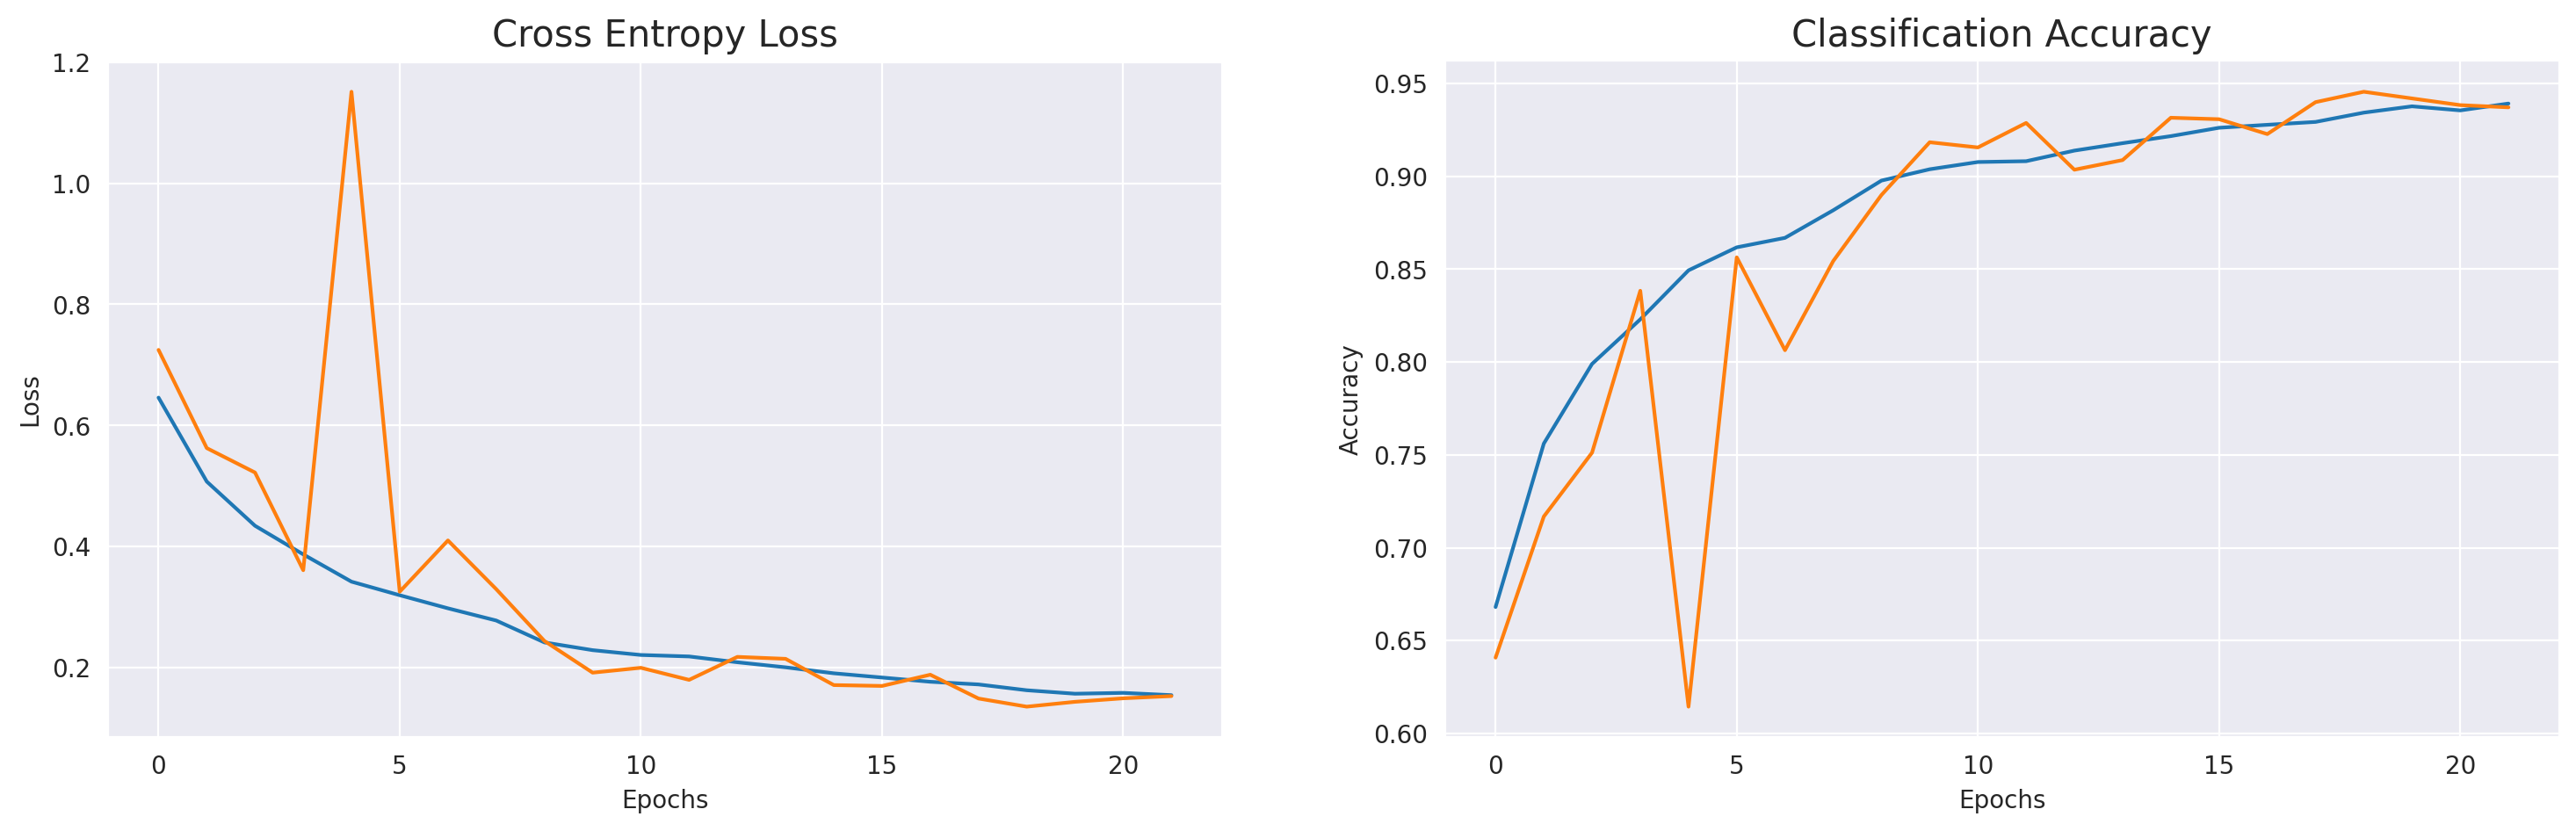

In [18]:
#plot for accuracy and loss with epochs

error = pd.DataFrame(cat_dog.history)
sns.set_style('darkgrid')
plt.figure(figsize=(18,5), dpi=200)

plt.subplot(121)
plt.title('Cross Entropy Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy', fontsize=15)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

<a id='17'></a>
<div class='alert alert-danger'><h3 style='text-align:center;color:black'>Evaluation</h3></div>

In [22]:
#evaluating the model on train generator data
loss, acc = model.evaluate(train_generator, batch_size=bat_size, verbose=0)

print('Accuracy of the model on training data is: ', acc*100)
print('Loss of the model on training data is: ', loss)

#evaluating the model on validation generator data
loss, acc = model.evaluate(val_generator, batch_size=bat_size, verbose=0)

print('Accuracy of the model on validation data is: ', acc*100)
print('Loss of the model on validation data is: ', loss)

Accuracy of the model on training data is:  95.83500027656555
Loss of the model on training data is:  0.10959088057279587
Accuracy of the model on validation data is:  93.59999895095825
Loss of the model on validation data is:  0.14587390422821045


In [23]:
#save model for future use
model.save('model.h5')

<a id='18'></a>
<div class='alert alert-info'><h2 style='text-align:center;color:black'>Prediction</h2></div>

In [24]:
#predicting the model on test data
result = model.predict(test_generator, batch_size= bat_size, verbose=0)

y_pred = np.argmax(result, axis=1)
y_true = test_generator.labels

#evaluate
loss, acc = model.evaluate(test_generator, batch_size=bat_size, verbose=0)

print('Accuracy of the model on test data is: ', acc*100)
print('Loss of the model on test data is: ', loss)

Accuracy of the model on test data is:  94.59999799728394
Loss of the model on test data is:  0.14257173240184784


In [29]:
labels = ['Cats', 'Dogs']
print(classification_report(y_true, y_pred, target_names=labels))

              precision    recall  f1-score   support

        Cats       0.93      0.97      0.95      1250
        Dogs       0.97      0.93      0.95      1250

    accuracy                           0.95      2500
   macro avg       0.95      0.95      0.95      2500
weighted avg       0.95      0.95      0.95      2500



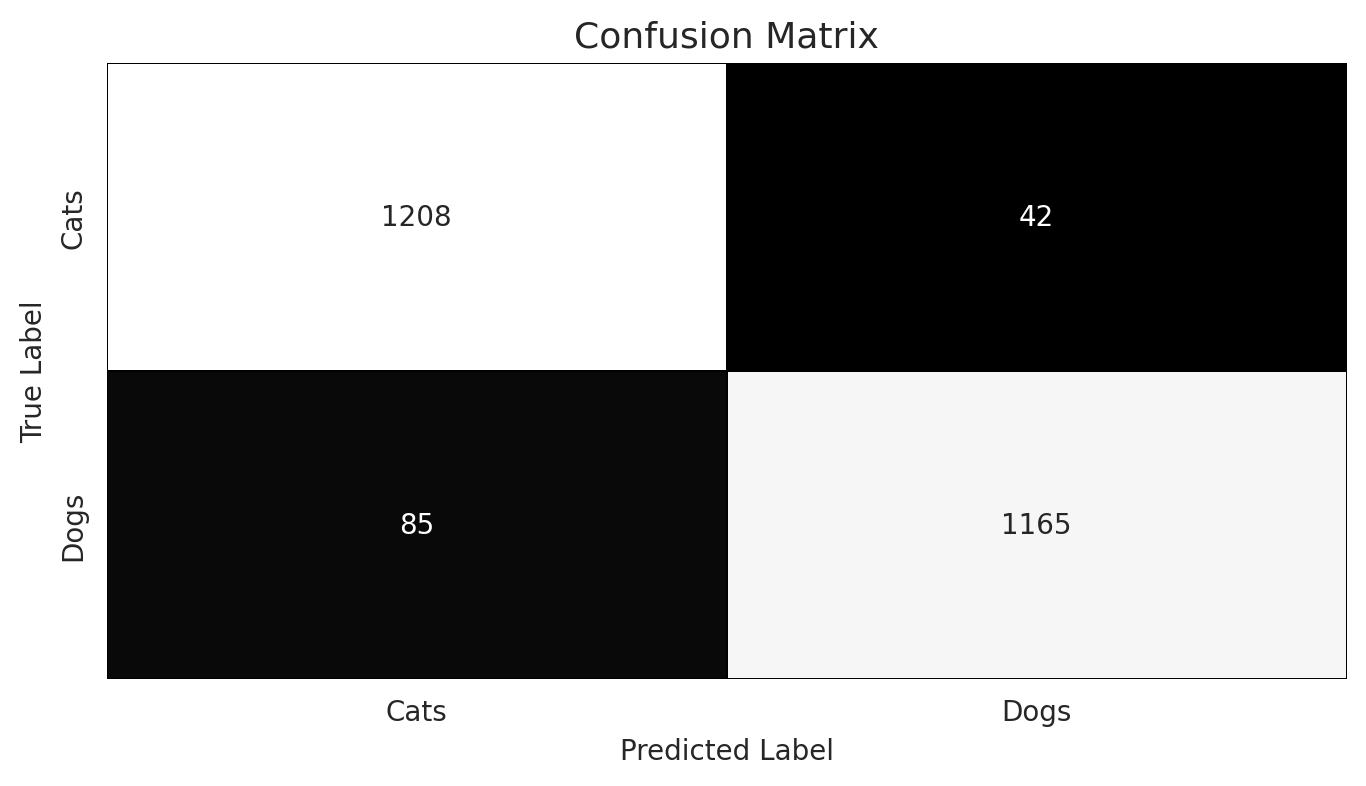

In [30]:
#confusion matrix
c_matrix = confusion_matrix(y_true, y_pred)

f,ax = plt.subplots(figsize = (8,4),dpi=200)
sns.heatmap(c_matrix, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax,cbar=False, xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label",fontsize=10)
plt.ylabel("True Label",fontsize=10)
plt.title("Confusion Matrix",fontsize=13)

plt.show()